In [ ]:
!pip install tensorflow

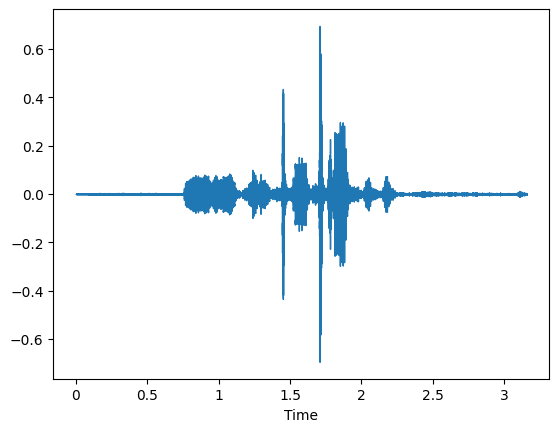

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load('/content/Lab1_voice.wav')
librosa.display.waveshow(y)

Shape of Bhanumathi_weds_Rajat features: (13, 103)
Shape of Bharath features: (13, 70)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_12 (Bidirect  (None, None, 128)         86016     
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 127297 (497.25 KB)
Trainable params: 127297 (497.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


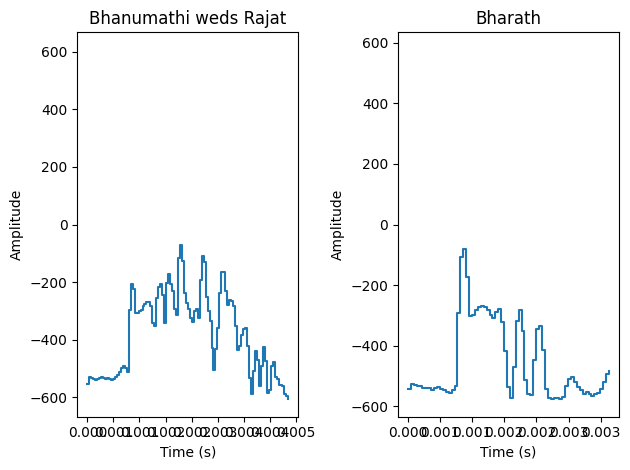

In [13]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense

# Function to extract features (STFT, MFCC, LPC coefficients) from audio files
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr

bhanumathi_weds_rajat_features, sr1 = extract_features('/content/Bhanumathi_weds_Rajat.wav')
bharath_features, sr2 = extract_features('/content/Bharath.wav')

print("Shape of Bhanumathi_weds_Rajat features:", bhanumathi_weds_rajat_features.shape)
print("Shape of Bharath features:", bharath_features.shape)

# Build LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(None, bhanumathi_weds_rajat_features.shape[1])))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

plt.subplot(1, 2, 1)
librosa.display.waveshow(bhanumathi_weds_rajat_features, sr=sr1)
plt.title('Bhanumathi weds Rajat')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot Bharat
plt.subplot(1, 2, 2)
librosa.display.waveshow(bharath_features, sr=sr2)
plt.title('Bharath')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
